Unified Header:
  "basename": "higher_res"
  "bw": -31.640625
  "center_freq": 135.260009765625
  "dec_deg": 23.173333333333332
  "dtype": "float32"
  "fch1": 151.068115234375
  "filelist": [
    "/home/euflash-dkuiper/lotaas_reprocessing/explore/higher_res.fil"
  ]
  "filename": "/home/euflash-dkuiper/lotaas_reprocessing/explore/higher_res.fil"
  "foff": -0.0244140625
  "format": "fil"
  "frequency_decimation_factor": 1
  "gb": -36.41441845252749
  "gl": -79.03927879554962
  "native_foff": -0.0244140625
  "native_nbits": 32
  "native_nchans": 1296
  "native_nspectra": 1830912.000771605
  "native_tsamp": 0.0019660800000000003
  "nbits": 32
  "nchans": 1296
  "npol": 1
  "nspectra": 1830912
  "poln_order": "I"
  "ra_deg": 353.7416666666667
  "source_name": "LOTAAS-P1599C-SAP0"
  "time_decimation_factor": 1
  "tsamp": 0.0019660800000000003
  "tstart": 57980.044444444444
  "tstart_utc": "2017-08-15T01:04:00.000"



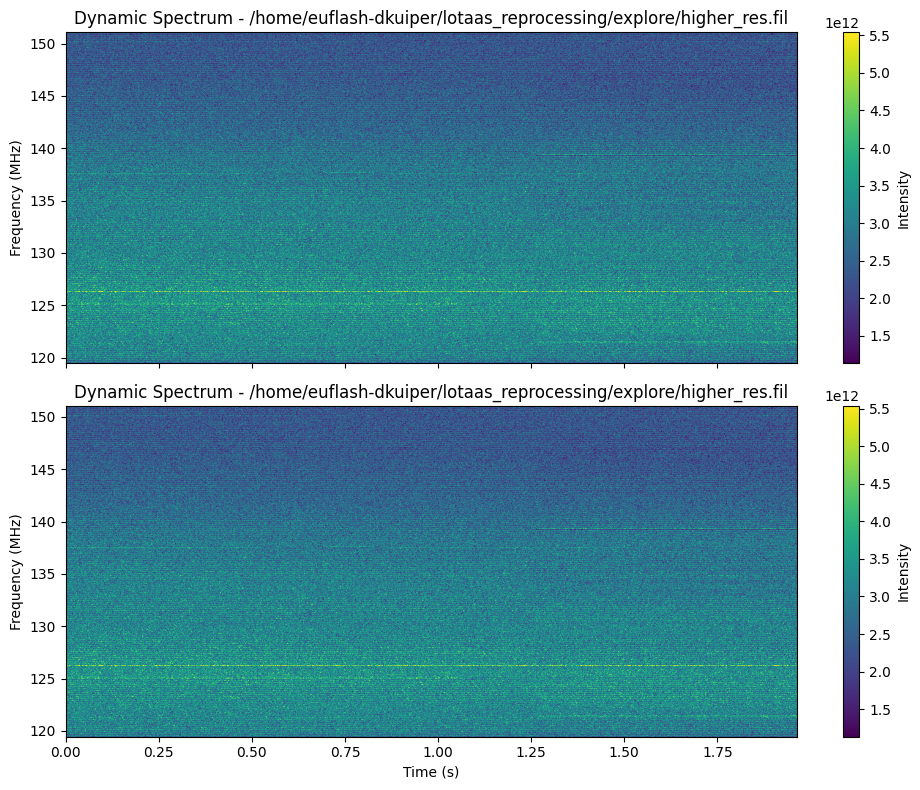

In [1]:
import your
import matplotlib.pyplot as plt
import numpy as np

# File names
file1 = '/home/euflash-dkuiper/lotaas_reprocessing/explore/higher_res.fil'
file2 = '/home/euflash-dkuiper/lotaas_reprocessing/explore/higher_res.fil'

# Load filter bank files
data1 = your.Your(file1)
data2 = your.Your(file2)

# Print header for confirmation
header1 = data1.your_header
print(header1)

# Extract header values
fch1 = header1.fch1
foff = header1.foff
nchans = header1.nchans
tsamp = header1.tsamp
nspectra = header1.nspectra


# Define start point and number of samples (e.g., first 1000 samples)
nstart = 0
nsamp = 1000  # Adjust as needed based on your data

# Extract the data as dynamic spectra (time vs. frequency)
spectrum1 = data1.get_data(nstart, nsamp)  # 2D array (time, frequency) for file1
spectrum2 = data2.get_data(nstart, nsamp)  # 2D array (time, frequency) for file2

# Calculate frequency and time axes
frequencies = fch1 + np.arange(nchans) * foff  # Frequency array in MHz
times = np.arange(nstart, nstart + nsamp) * tsamp  # Time array in seconds

# Calculate percentiles for intensity scaling
zmin1, zmax1 = np.nanpercentile(spectrum1, (5, 99))
zmin2, zmax2 = np.nanpercentile(spectrum2, (5, 99))

# Plotting the dynamic spectrum for both files
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Dynamic spectrum for file1
c1 = ax1.imshow(spectrum1.T, aspect='auto', origin='lower', vmin=zmin1, vmax=zmax1,
                extent=[times[0], times[-1], frequencies[-1], frequencies[0]])
ax1.set_title(f'Dynamic Spectrum - {file1}')
ax1.set_ylabel('Frequency (MHz)')
fig.colorbar(c1, ax=ax1, label='Intensity')

# Dynamic spectrum for file2
c2 = ax2.imshow(spectrum2.T, aspect='auto', origin='lower', vmin=zmin2, vmax=zmax2,
                extent=[times[0], times[-1], frequencies[-1], frequencies[0]])
ax2.set_title(f'Dynamic Spectrum - {file2}')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (MHz)')
fig.colorbar(c2, ax=ax2, label='Intensity')

plt.tight_layout()
plt.show()


In [8]:
!ls

aaa_test
ACCEL_sift.py
all_detected_candidates.cands
all_matched_filter_overview.png
all_urls.csv
anaconda.def
anaconda.sif
B1112+50
beam_process_node.txt
candidate_plots
cands.txt
chi-squared.txt
cleaned_combined.singlepulse
clustered_candidates.txt
clustered_singlepulse.csv
cluster.ipynb
cluster.py
combined.pdf
combined.singlepulse
combined.th.png
container.def
cupy_container.def
cupy_container.sif
ddplanff.eps
ddplanfr.eps
ddplanfr.pdf
ddplan.pdf
dedisp_dedispff.py
dedisp_L600877_SAP001_B027_ff.py
dedisp_L600877_SAP001_B027.py
DM_trials
dspsr_status.png
explorefil.ipynb
explorer_chime.ipynb
fetch
file_list.txt
filter.py
flatfielding
highest_sigma_pulses.csv
incoherentstokes
iqrm
L1145896_summaryIS_9e14fef1.tar
L1262356_SAP000_B014_P000_bf_7e83a17e.tar
L1401972_summaryIS_665dcb9d.tar
L374111_summaryIS.log
L374113_obsinfo.png
L374113.pseudo.parset
L374113_SAP0_IS_rfifind.pdf
L374113_SAP0_IS_rfis.png
L374113_SAP1_IS_rfifind.pdf
L374113_SAP1_IS_rfis.png
L374113_SAP2_IS_rfifind.pdf
L3741

{'telescope_id': 11, 'machine_id': -1, 'data_type': 1, 'rawdatafile': '', 'source_name': 'LOTAAS-P1599C-SAP0', 'barycentric': 0, 'pulsarcentric': 0, 'az_start': 0.0, 'za_start': 0.0, 'src_raj': 233458.0, 'src_dej': 231024.0, 'tstart': 57980.044444444444, 'tsamp': 0.0019660800000000003, 'nbits': 32, 'fch1': 151.068115234375, 'foff': -0.0244140625, 'nchans': 1296, 'nifs': 1}
-5.587530438333488e-08
2877.916


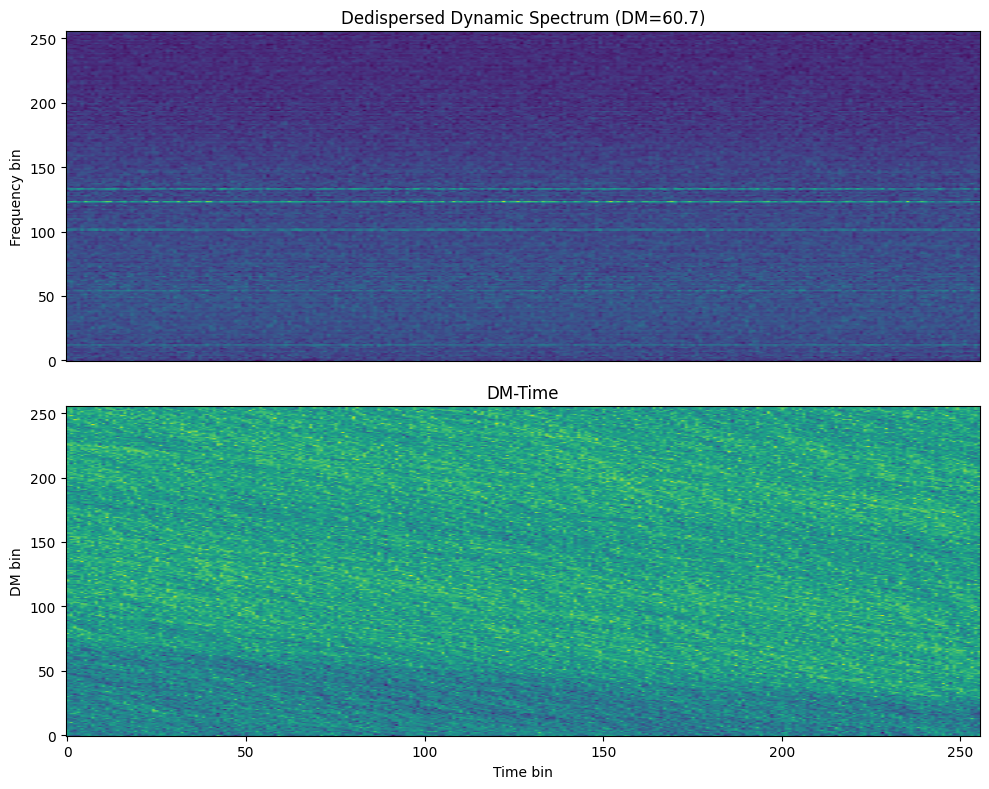

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from your.candidate import Candidate
from your.utils.math import normalise
from your.candidate import crop
import sys
from astropy.time import Time
# Import your custom filterbank module
sys.path.append("/home/euflash-dkuiper/lotaas_reprocessing/src")
import filterbank


# --- File + candidate info ---
fil_path = "/home/euflash-dkuiper/lotaas_reprocessing/explore/higher_res.fil"
dm = 60.7
true_detect_time = 2877.916  # original burst time
fil = filterbank.FilterbankFile(fil_path, "read")
print(fil.header)
original_date_obs = "2017-08-15T01:04:00"  # ← hardcoded from PSRFITS DATE-OBS
tstart_sec = (Time(fil.tstart, format="mjd") - Time(original_date_obs, format="isot", scale="utc")).to_value('sec')
print(tstart_sec)
tcand = true_detect_time
print(tcand)
fil.close()
width = 4       # In samples (adjust to your expected pulse width)

# --- Create Candidate ---
cand = Candidate(
    fp=fil_path,
    dm=dm,
    tcand=tcand,
    width=width,
    label=-1,
    snr=-1,
    min_samp=256,
    device=0,
)

cand.get_chunk()
cand.dmtime(dmsteps=256)
cand.dedisperse()

# --- Format and normalize ---
time_size, freq_size, dm_size = 256, 256, 256
cand.dedispersed = crop(cand.dedispersed, cand.dedispersed.shape[0]//2 - time_size//2, time_size, 0)
cand.dedispersed = normalise(cand.dedispersed)

cand.decimate(key="ft", axis=1, pad=True, decimate_factor=cand.dedispersed.shape[1] // freq_size, mode="median")
cand.resize(key="ft", size=freq_size, axis=1, anti_aliasing=True, mode="constant")

cand.decimate(key="dmt", axis=1, pad=True, decimate_factor=max(1, width // 2), mode="median")
cand.dmt = crop(cand.dmt, cand.dmt.shape[1]//2 - time_size//2, time_size, axis=1)
cand.dmt = crop(cand.dmt, cand.dmt.shape[0]//2 - dm_size//2, dm_size, axis=0)
cand.resize(key="dmt", size=dm_size, axis=1, anti_aliasing=True, mode="constant")
cand.dmt = normalise(cand.dmt)

# --- Plot ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.imshow(cand.dedispersed.T, aspect="auto", cmap="viridis", origin="lower")
ax1.set_title(f"Dedispersed Dynamic Spectrum (DM={dm})")
ax1.set_ylabel("Frequency bin")
ax1.set_xticks([])

ax2.imshow(cand.dmt, aspect="auto", cmap="viridis", origin="lower")
ax2.set_title("DM-Time")
ax2.set_xlabel("Time bin")
ax2.set_ylabel("DM bin")

plt.tight_layout()
plt.show()

In [1]:
import iqrm

In [5]:
import pandas as pd

# Load the data, skipping the header row that starts with '#'
data = pd.read_csv("cleaned_combined.singlepulse", delim_whitespace=True, comment='#',
                   names=['DM', 'Sigma', 'Time (s)', 'Sample', 'Downfact'])

# Find the maximum Sigma value
max_sigma = data['Sigma'].max()
print("Highest Sigma:", max_sigma)


Highest Sigma: 8.42


/tmp/ipykernel_201285/1502692276.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("cleaned_combined.singlepulse", delim_whitespace=True, comment='#',


In [9]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Load the data, skipping the header row that starts with '#'
data = pd.read_csv("cleaned_combined.singlepulse", delim_whitespace=True, comment='#',
                   names=['DM', 'Sigma', 'Time (s)', 'Sample', 'Downfact'])

# Filter by a Sigma threshold to keep only high S/N pulses
sigma_threshold = 6.0  # Adjust this threshold as needed
filtered_data = data[data['Sigma'] >= sigma_threshold]

# Perform clustering using DBSCAN based on 'DM' and 'Time (s)'
db = DBSCAN(eps=2, min_samples=3).fit(filtered_data[['DM', 'Time (s)']])
filtered_data['Cluster'] = db.labels_

# Filter out noise points (DBSCAN assigns -1 to noise)
clusters = filtered_data[filtered_data['Cluster'] != -1]

# Find the highest Sigma pulse within each cluster
top_pulses = clusters.loc[clusters.groupby('Cluster')['Sigma'].idxmax()]

# Output the relevant columns for visualization
top_pulses = top_pulses[['DM', 'Time (s)', 'Sigma']]

# Save or display the results
top_pulses.to_csv('top_pulses_for_visualization.csv', index=False)
print("Top potential pulses for visualization:")
print(top_pulses)


Top potential pulses for visualization:
         DM     Time (s)  Sigma
22      0.1  1166.687601   6.82
145     1.2  3307.850957   8.42
90      0.7   881.661051   7.25
455   107.0  2057.715057   6.57
544    11.1  3036.799304   6.33
1240   14.9  3307.001610   6.31
713   116.2  2678.933422   6.29
1315  145.1  2603.569644   6.50
1659   17.6  3036.752118   6.30
1728   18.9  3306.985882   6.43
1924   21.5   962.632090   7.05
1802    2.4   553.333555   6.98
2234   27.9  3319.018291   6.49
2768   43.0   676.040540   6.41
2920   44.4  1852.715827   6.37
3054   44.9  2676.440433   6.28
3075   45.0  1970.373919   6.36
3973   59.1  3130.534134   6.05
4838    9.5  1217.263043   7.05
4908   91.7   759.779820   6.56


/tmp/ipykernel_201285/3587512824.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("cleaned_combined.singlepulse", delim_whitespace=True, comment='#',
/tmp/ipykernel_201285/3587512824.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = db.labels_


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the cleaned singlepulse data
data = pd.read_csv("cleaned_combined.singlepulse", delim_whitespace=True, comment='#',
                   names=['DM', 'Sigma', 'Time (s)', 'Sample', 'Downfact'])

# Step 1: Filter by a Sigma threshold to keep only high S/N pulses
sigma_threshold = 5.0  # Adjust this threshold as needed
filtered_data = data[data['Sigma'] >= sigma_threshold]

# Step 2: Perform clustering based on DM and Time (s)
db = DBSCAN(eps=2, min_samples=10).fit(filtered_data[['DM', 'Time (s)']])
filtered_data['Cluster'] = db.labels_

# Step 3: Extract the highest Sigma pulse within each cluster
# Remove noise points (DBSCAN assigns -1 to noise)
clusters = filtered_data[filtered_data['Cluster'] != -1]
top_pulses = clusters.loc[clusters.groupby('Cluster')['Sigma'].idxmax()]

# Step 4: Plot DM vs. Time with highlighted cluster centers
plt.figure(figsize=(10, 6))

# Scatter plot of all high-S/N pulses
plt.scatter(filtered_data['Time (s)'], filtered_data['DM'], s=10, alpha=0.5, label="High S/N Pulses")

# Highlight cluster centers
plt.scatter(top_pulses['Time (s)'], top_pulses['DM'], color='red', s=50, label="Cluster Centers")

# Labeling and legend
plt.xlabel("Time (s)")
plt.ylabel("DM")
plt.title("DM vs. Time with Cluster Centers Highlighted")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import your
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from iqrm import iqrm_mask
from matplotlib.gridspec import GridSpec

# Load the cleaned singlepulse data
data = pd.read_csv("cleaned_combined.singlepulse", delim_whitespace=True, comment='#',
                   names=['DM', 'Sigma', 'Time (s)', 'Sample', 'Downfact'])

# Filter and cluster as before
sigma_threshold = 5.0
filtered_data = data[data['Sigma'] >= sigma_threshold]
db = DBSCAN(eps=2, min_samples=10).fit(filtered_data[['DM', 'Time (s)']])
filtered_data['Cluster'] = db.labels_

# Get the top pulses for each cluster
clusters = filtered_data[filtered_data['Cluster'] != -1]
top_pulses = clusters.loc[clusters.groupby('Cluster')['Sigma'].idxmax()]

# Load the original filter bank data
file1 = 'L600877_SAP001_B027_ff.fil'
data1 = your.Your(file1)

# Extract header information
header1 = data1.your_header
fch1 = header1.fch1
foff = header1.foff
nchans = header1.nchans
tsamp = header1.tsamp

# Define a dedispersion function
def dedisperse(data, freq, dm, dt):
    f_ref = freq.max()
    delays = 4.15e3 * dm * (freq**-2 - f_ref**-2)
    delays_in_samples = (delays / dt).astype(int)
    dedispersed_data = np.zeros_like(data)
    for i, delay in enumerate(delays_in_samples):
        dedispersed_data[:, i] = np.roll(data[:, i], -delay)
    return dedispersed_data

# Apply IQRM masking function
def apply_iqrm_mask(data, threshold=6.0):
    abs_deviation = np.abs(data - np.median(data, axis=0))
    summed_deviation = np.sum(abs_deviation, axis=0)
    mask = iqrm_mask(summed_deviation, threshold=threshold)

    if isinstance(mask, tuple):
        mask = mask[0]

    masked_data = data.copy()
    masked_data[:, mask] = np.nan  # Set channels identified by IQRM as outliers to NaN

    # Calculate RFI fraction
    total_data_points = data.size
    rfi_count = np.isnan(masked_data).sum()
    rfi_fraction = rfi_count / total_data_points

    return masked_data, mask, rfi_fraction

# Step 4: Plot dedispersed dynamic spectrum for each cluster center with IQRM mask
for _, pulse in top_pulses.iterrows():
    dm = pulse['DM']
    time_idx = int(pulse['Time (s)'] / tsamp)
    n_samples = 512  # Adjust the number of samples for visualization around the pulse

    # Extract a window of data around the time of interest
    spectrum = data1.get_data(time_idx - n_samples // 2, n_samples)

    # Apply IQRM masking to the extracted data
    iqrm_threshold = 3.0  # Adjust threshold as needed
    masked_spectrum, mask, rfi_fraction = apply_iqrm_mask(spectrum, threshold=iqrm_threshold)
    print(f"RFI Fraction: {rfi_fraction:.2%}")

    # Dedisperse the masked data
    frequencies = fch1 + np.arange(nchans) * foff
    dedispersed_spectrum = dedisperse(masked_spectrum, frequencies, dm, tsamp)

    # Calculate vmin and vmax based on the 5th and 95th percentiles of the masked and dedispersed data
    vmin, vmax = np.nanpercentile(dedispersed_spectrum, [5, 95])

    # Generate time axis
    times = np.arange(-n_samples // 2, n_samples // 2) * tsamp

    # Compute frequency-summed time series, but only within the same time range
    time_series = np.nansum(dedispersed_spectrum, axis=1)

    # Create the figure with GridSpec layout
    fig = plt.figure(figsize=(10, 8))
    gs = GridSpec(2, 2, height_ratios=[1, 4], width_ratios=[20, 1])
    ax0 = fig.add_subplot(gs[0, 0])  # Time series plot
    ax1 = fig.add_subplot(gs[1, 0], sharex=ax0)  # Dynamic spectrum
    cbar_ax = fig.add_subplot(gs[1, 1])  # Colorbar

    # Top plot: frequency-summed time series
    ax0.plot(times, time_series, color='black')
    ax0.set_xlim(times[0], times[-1])  # Ensure both subplots use the same x-limits
    ax0.set_ylabel("Summed Intensity")
    ax0.set_title(f"Frequency-Summed Time Series and Dynamic Spectrum for DM={dm}, Time={pulse['Time (s)']:.2f}s")

    # Remove x-ticks and y-ticks from the time series plot
    ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax0.tick_params(axis='y', which='both', left=False, labelleft=False)

    # Bottom plot: dynamic spectrum with IQRM mask
    cax = ax1.imshow(dedispersed_spectrum.T, aspect='auto', origin='lower',
                     extent=[times[0], times[-1], frequencies[-1], frequencies[0]],
                     vmin=vmin, vmax=vmax)
    fig.colorbar(cax, cax=cbar_ax, label='Intensity')
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Frequency (MHz)")

    # Adjust layout to remove horizontal and vertical space
    plt.subplots_adjust(hspace=0, wspace=0.02)  # Adjust wspace to bring colorbar closer

    plt.show()


ValueError: cannot reshape array of size 106168321 into shape (1,2592)

In [1]:
import iqrm